In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df1 = pd.read_csv("../k2scoc/results/tables/lost_table.csv")
df2 = pd.read_csv("../k2scoc/results/tables/full_table.csv")
df = pd.concat([df1,df2])
df = df[~df.real.isnull()]
df.shape

(8666, 25)

In [4]:
r = pd.DataFrame(df.groupby(["EPIC","C"]).real.sum()).reset_index()
s = r[r.real==0][["EPIC","C"]]
df2 = df[df.EPIC.isin(s.EPIC) & df.C.isin(s.C)]
df2.shape

(3913, 25)

In [5]:
df.groupby("real").count()

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dtp_tot,...,complex,multiperiod,cluster,Lum_Kepler,e_Lum_Kepler,Teff_median,Teff_std,todrop,Unnamed: 0,length
real,,,,,,,,,,,,,,,,,,,,,
-1.0,89,89,89,89,89,89,89,89,89,90,...,60,0,94,94,94,94,94,36,91,91
0.0,3665,3665,3665,3665,3665,3665,3665,3665,3665,4532,...,92,0,4532,4532,4532,4532,4532,430,3173,2309
1.0,4040,4040,4040,4040,4040,4040,4040,4040,4040,4040,...,69,0,4040,4040,4040,4040,4040,86,2990,2990


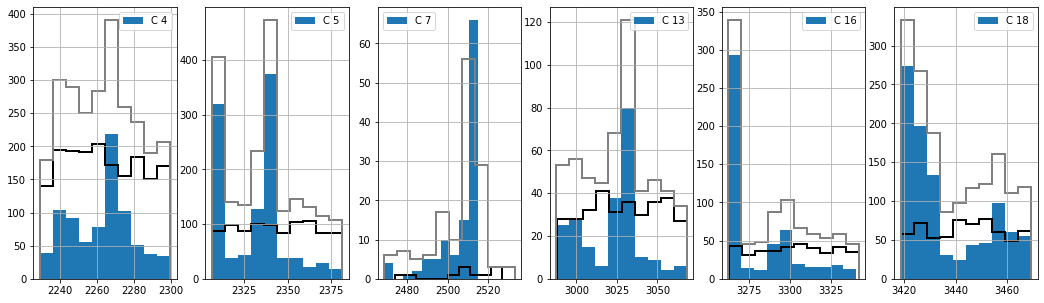

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=6,figsize=(18,5))
i=0
for label, group in df[df.real == 0].groupby("C"):
    group.tstart.hist(bins=10, ax=ax[i],label=f"C {label}")
    ax[i].legend()
    i += 1
i=0
for label, group in df[df.real == 1].groupby("C"):
    group.tstart.hist(bins=10, ax=ax[i],histtype="step", edgecolor="k", linewidth=2)
    ax[i].legend()
    i += 1
    
i=0
for label, group in df.groupby("C"):
    group.tstart.hist(bins=10, ax=ax[i],histtype="step", edgecolor="grey", linewidth=2)
    ax[i].legend()
    i += 1    
    
plt.savefig("plots/false_positives.png",dpi=300)

In [23]:
5500*.65

3575.0